In [1]:
import pandas as pd
from IPython.display import Image, display
import base64

import download_info as di
import top_stocks as ts
import process as p
import chart_combined as cc
import chart_available_dates as cad

api_key = '6669d7a6eb70f4.27564131'

# Top S&P 500 
# AAPL.US,MSFT.US.NVDA.US,AMZN.US,META.US,GOOGL.US,GOOG.US,LLY.US,JPM.US,BRK-B.US,V.US,PG.US,UNH.US,AVGO.US,JNJ.US
tickers = "AAPL.US,MSFT.US,NVDA.US,JPM.US,V.US,UNH.US,JNJ.US"
tickers = tickers.split(',')

# Constants for the number of days before earnings and after dividend
days_after_dividend = 0  # Number of days after the dividend to buy
days_before_earnings = 0  # Number of days before earnings to sell

# Define the period of analysis
start_date = '2019-09-09'
end_date = '2024-09-09'

# Initial nominal investment in each stock
initial_investment = 1000

downloaded_data = di.download_data(api_key, tickers, start_date, end_date)



Fetching data for AAPL.US...
Loading from cache: cache\AAPL.US\eod_AAPL.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json
Loading from cache: cache\AAPL.US\calendar_earnings\api_token_6669d7a6eb70f4_27564131_from_2019-09-09_to_2024-09-09_symbols_AAPL_US_fmt_json.json
Loading from cache: cache\AAPL.US\div_AAPL.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json
Loading from cache: cache\AAPL.US\historical-market-cap_AAPL.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json

Fetching data for MSFT.US...
Loading from cache: cache\MSFT.US\eod_MSFT.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json
Loading from cache: cache\MSFT.US\calendar_earnings\api_token_6669d7a6eb70f4_27564131_from_2019-09-09_to_2024-09-09_symbols_MSFT_US_fmt_json.json
Loading from cache: cache\MSFT.US\div_MSFT.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json
Loading fr

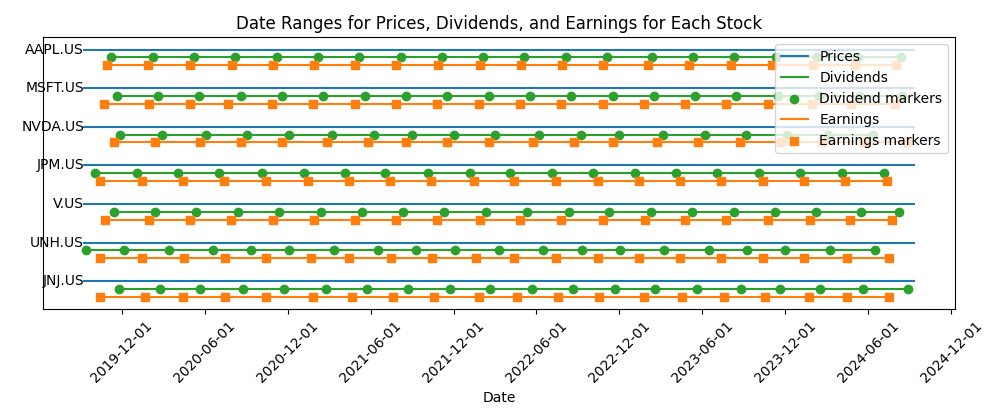

In [2]:
base64_image = cad.plot_stock_date_ranges(downloaded_data)
display(Image(data=base64.b64decode(base64_image), format='png'))

In [3]:
market_caps = p.process_market_caps(downloaded_data)
top_stocks_by_date = ts.create_top_stocks_by_date(market_caps, start_date, end_date, 5)

No data for MSFT.US on or before 2019-09-09 00:00:00
No data for NVDA.US on or before 2019-09-09 00:00:00
No data for JPM.US on or before 2019-09-09 00:00:00
No data for V.US on or before 2019-09-09 00:00:00
No data for UNH.US on or before 2019-09-09 00:00:00
No data for JNJ.US on or before 2019-09-09 00:00:00
No data for MSFT.US on or before 2019-09-10 00:00:00
No data for NVDA.US on or before 2019-09-10 00:00:00
No data for JPM.US on or before 2019-09-10 00:00:00
No data for V.US on or before 2019-09-10 00:00:00
No data for UNH.US on or before 2019-09-10 00:00:00
No data for JNJ.US on or before 2019-09-10 00:00:00
No data for MSFT.US on or before 2019-09-11 00:00:00
No data for NVDA.US on or before 2019-09-11 00:00:00
No data for JPM.US on or before 2019-09-11 00:00:00
No data for V.US on or before 2019-09-11 00:00:00
No data for UNH.US on or before 2019-09-11 00:00:00
No data for JNJ.US on or before 2019-09-11 00:00:00
No data for MSFT.US on or before 2019-09-12 00:00:00
No data for

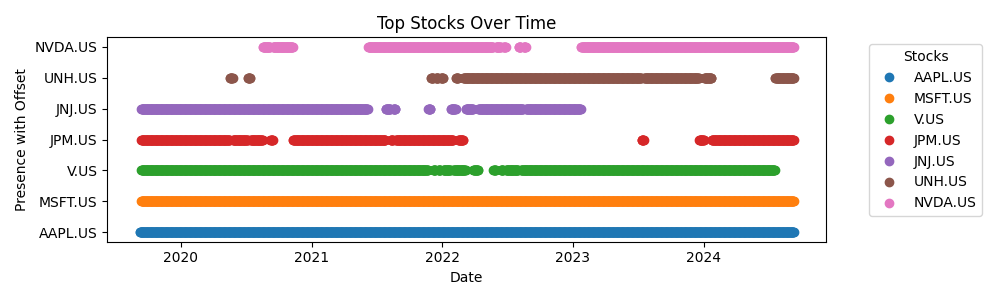

In [4]:
plot_top_stocks_base64 = ts.chart_top_stocks(top_stocks_by_date)
display(Image(data=base64.b64decode(plot_top_stocks_base64), format='png'))

In [5]:
investment_results, free_capital_errors = p.process(downloaded_data, top_stocks_by_date, days_after_dividend, days_before_earnings, initial_investment)

2019-10-03: Bought: JPM.US, Pool: 0, Investment: $1000.00
2019-10-15: Sold: JPM.US, Pool: 0, Gain: $69.26, Total Return: $1069.26
2019-11-07: Bought: AAPL.US, Pool: 0, Investment: $1069.26
2019-11-14: Bought: V.US, Pool: 1, Investment: $1000.00
2019-11-20: Bought: MSFT.US, Pool: 2, Investment: $1000.00
2019-11-25: Bought: JNJ.US, Pool: 3, Investment: $1000.00
2020-01-03: Bought: JPM.US, Pool: 4, Investment: $1000.00
2020-01-14: Sold: JPM.US, Pool: 4, Gain: $3.33, Total Return: $1003.33
2020-01-22: Sold: JNJ.US, Pool: 3, Gain: $80.70, Total Return: $1080.70
2020-01-28: Sold: AAPL.US, Pool: 0, Gain: $240.12, Total Return: $1309.38
2020-01-29: Sold: MSFT.US, Pool: 2, Gain: $123.11, Total Return: $1123.11
2020-01-30: Sold: V.US, Pool: 1, Gain: $158.33, Total Return: $1158.33
2020-02-07: Bought: AAPL.US, Pool: 0, Investment: $1309.38
2020-02-13: Bought: V.US, Pool: 1, Investment: $1158.33
2020-02-19: Bought: MSFT.US, Pool: 2, Investment: $1123.11
2020-02-24: Bought: JNJ.US, Pool: 3, Investm

In [6]:
print(free_capital_errors)

[('JPM.US', '2021-07-02'), ('JPM.US', '2021-10-05'), ('JPM.US', '2022-01-05')]


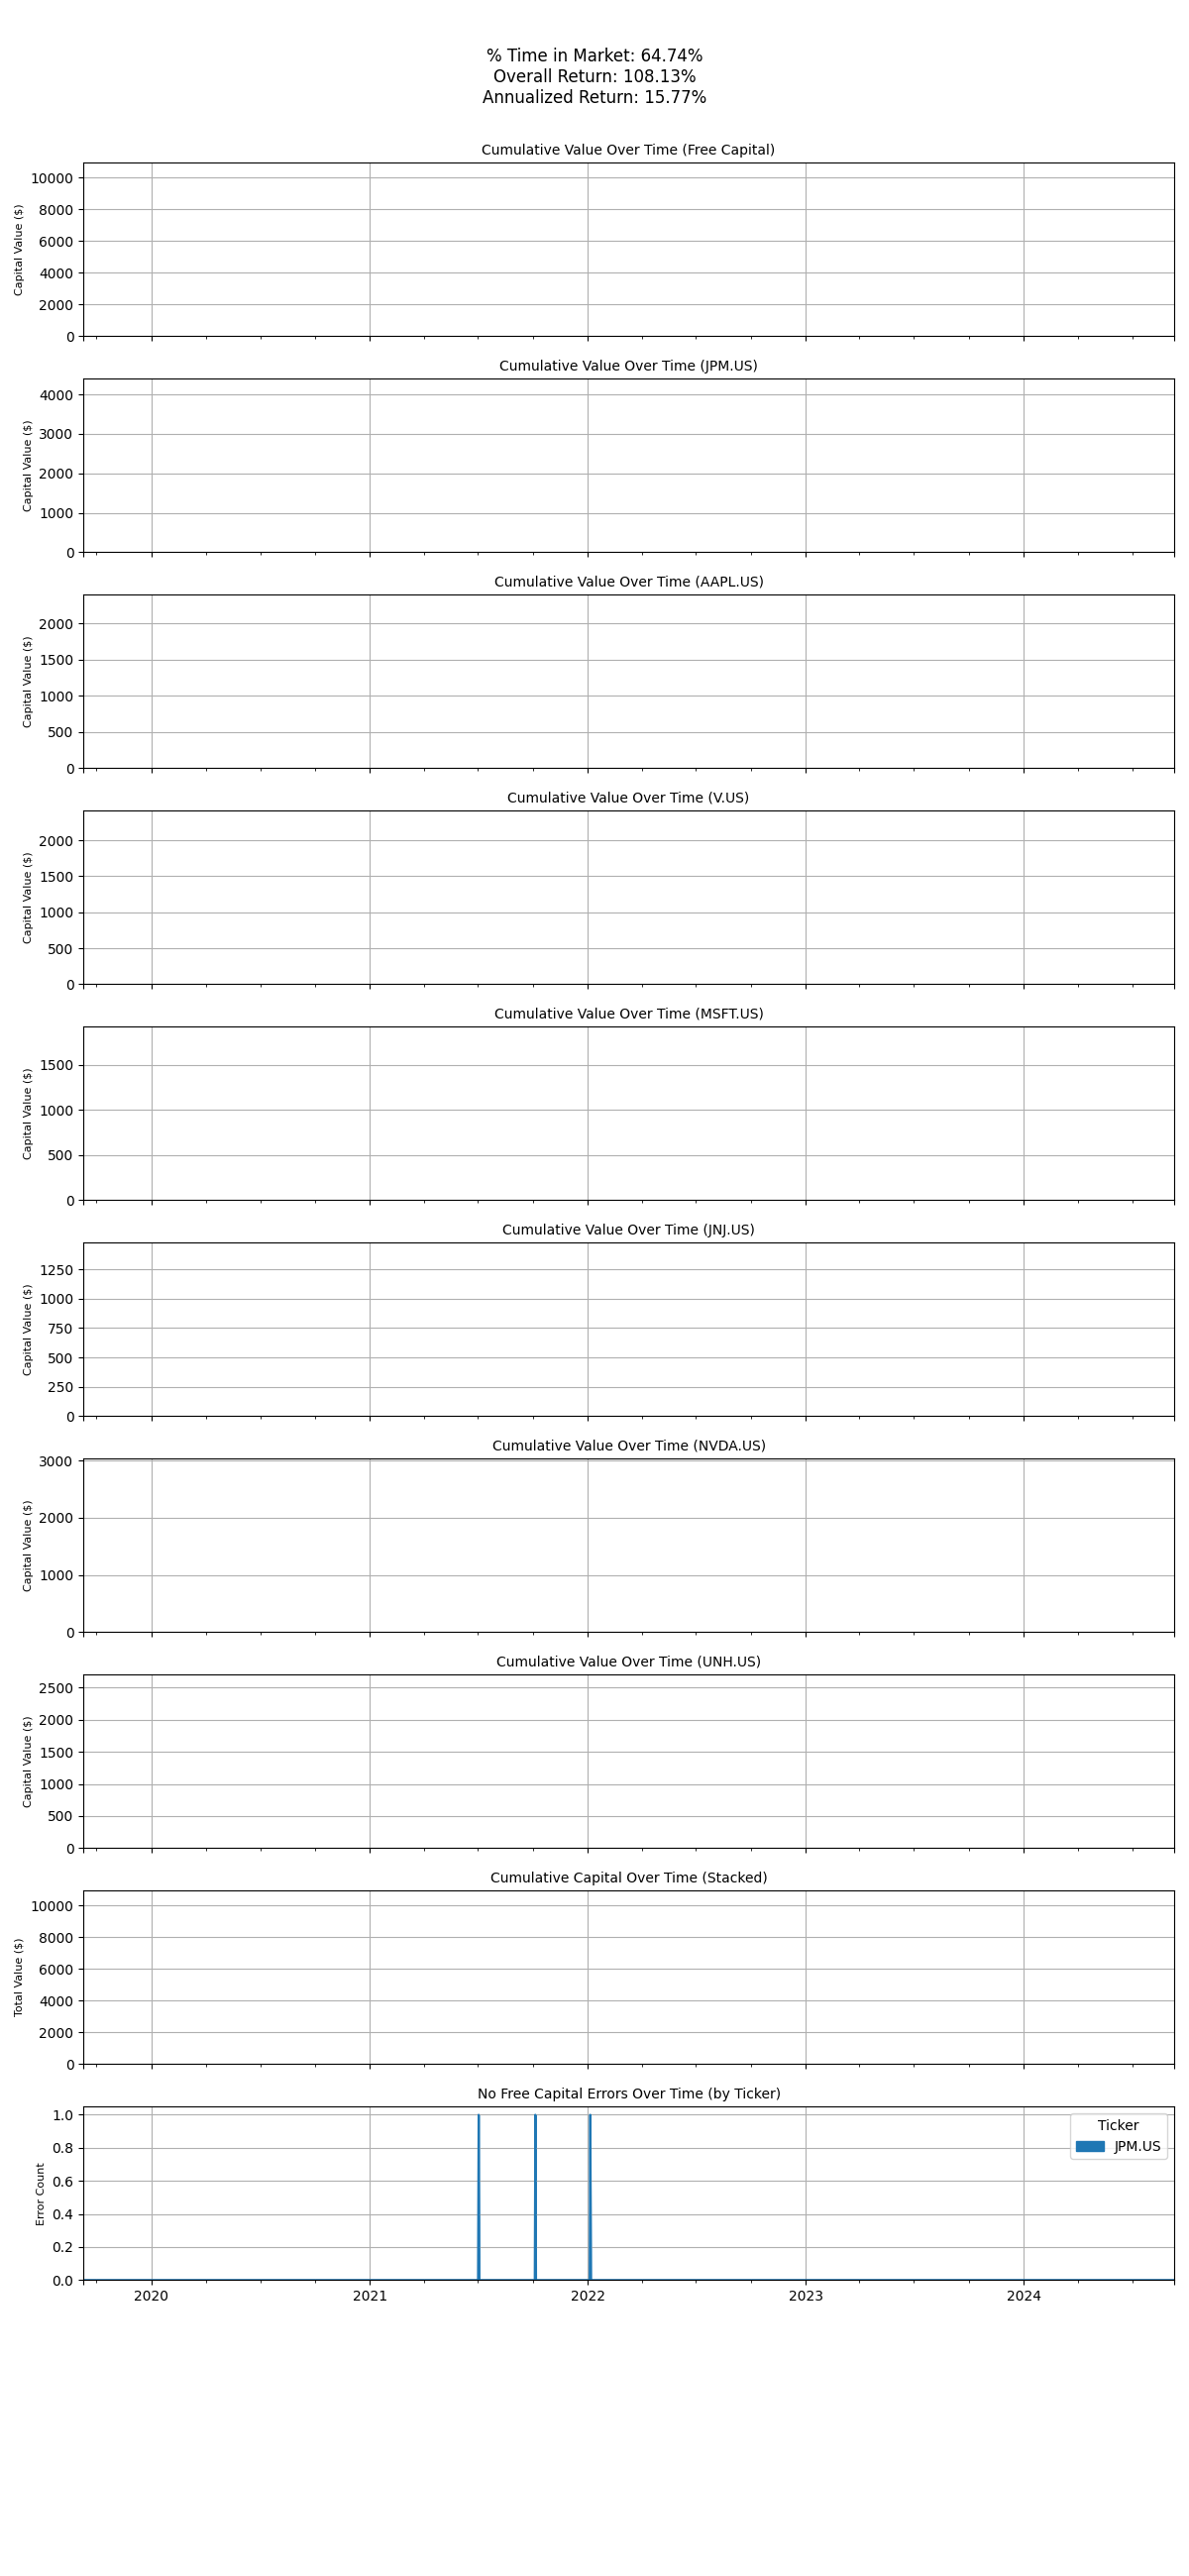

In [7]:
base64_image = cc.chart_combined(investment_results, free_capital_errors, start_date, end_date)
display(Image(data=base64.b64decode(base64_image), format='png'))